# Apartment prices
To start of we load the libraries `dplyr` and `ggplot2` which are going to be used in this homework. After thatt we can read the csv file containing the data about apartment prices to a dataframe.

In [1]:
library("dplyr")
library("ggplot2")
booli_df<-read.csv("data/Booli_sold.csv")


NameError: name 'library' is not defined

Calculating price per square meter (ppsqm) and sorting in decreasing order

After that we can select the columns we are going to use and add the column ppsqm for the price per square meter. Before we are done the rows are sorted by ppsqm in descending order and `NA` values are removed.

In [ ]:
booli_df<-booli_df %>%
select(livingArea,soldPrice,booliId,source.name)%>%
mutate(ppsqm=soldPrice/livingArea) %>%
arrange(desc(ppsqm)) %>%
filter(is.na(ppsqm)==FALSE)

After this we can simply select the 5 largest values from the modified dataframe.

In [ ]:

booli_df %>%
filter(min_rank(desc(ppsqm)) <= 5)


livingArea,soldPrice,booliId,source.name,ppsqm
<dbl>,<int>,<int>,<chr>,<dbl>
24.0,2500000,2018259,Notar,104166.67
24.0,2450000,2125576,HusmanHagberg,102083.33
23.0,2300000,2078171,Notar,100000.00
25.0,2210000,2330886,HusmanHagberg,88400.00
26.9,2300000,2067384,Notar,85501.86


Calculating the average value of ppsqm is also quite trivial as we just have to apply the function `mean` to the column ppsqm.

In [ ]:

mean(booli_df$ppsqm)

[1] 58759.38

One interesting thing from the data is that apartments sold/bought through HusmanHagberg, have an average price per square meter that is more than double that of Bostadsrättsspecialisten.

In [ ]:
booli_df%>%
select(source.name,ppsqm)%>%
group_by(source.name)%>%
summarise(avg_ppsqm=mean(ppsqm))%>%
arrange(desc(avg_ppsqm))

source.name,avg_ppsqm
<chr>,<dbl>
HusmanHagberg,87875.40
Mäklarhuset,83103.45
Historiska Hem AB,75432.10
Vision Fastighetsmäkleri AB,69642.86
Mäklarcentrum,69230.77
ERA,68802.47
Bjurfors,68695.65
Svensk Fastighetsförmedling,61125.61
Notar,58702.68


# Swedish election of 2018
Once again we start by reading the data from the csv file to a dataframe

In [ ]:
election_df<-read.csv("data/2018_R_per_kommun.csv",sep=";",dec=",")


The total number of legitimate voters in stockholm can be calculated by filtering on the column LÄNSKOD, selecting the column of interest and finlly taking the sum of that column

In [ ]:
election_df%>%filter(LÄNSKOD==1)%>%select(RÖSTER.GILTIGA)%>%sum()

[1] 1426237

In order to decide in which municipality Socialdemokraterna got the highest percentage of votes we first select the columns of interest. We can then just filter the column containing the percentage of votes for the largest value.

After which we can see that the municipality with the highest percentage of votes for Socialdemokraterna was Munkfors where 52.18 % of voters voted for them.

In [ ]:
election_df%>%select(KOMMUNNAMN,S)%>%filter(rank(desc(S))==1)


KOMMUNNAMN,S
<chr>,<dbl>
Munkfors,52.18


To decide which municipalities had the highest voter turnout we once again start by selecting the columns of interest.

As we are looking for more then one value this time the column of voter turnouts is sorted in descending order and filtered for the three largest values.

The municipalities with the highest voter turnouts was Lomma,Habo and Vellinge with 93.86%, 93.35% and 93.135 voter turnout respectivly

In [ ]:
election_df%>%select(KOMMUNNAMN,VALDELTAGANDE)%>%arrange(desc(VALDELTAGANDE))%>%filter(rank(desc(VALDELTAGANDE))<=3)


KOMMUNNAMN,VALDELTAGANDE
<chr>,<dbl>
Lomma,93.86
Habo,93.35
Vellinge,93.13


# Stroke data
As before we start by reading the data from the .csv file. 

In [ ]:
stroke_df<-read.csv("data/stroke-data.csv")


We are going to investigate how gender and age affect the ratio of people who have had strokes.

Therefore we first select the columns of interest and filter out genders equal to other. Then we can group them by age and gender and finally modify the column stroke to be the mean of strokes for the specified age and gender. This could be viewed as the probability of having a stroke, but not in a very rigourous sense.


In [ ]:
stroke_by_age<-stroke_df%>%select(age,stroke,gender)%>%filter(gender!="Other")%>%group_by(age,gender)%>%mutate(stroke=mean(stroke))


Then the data is visualized through a scatterplot

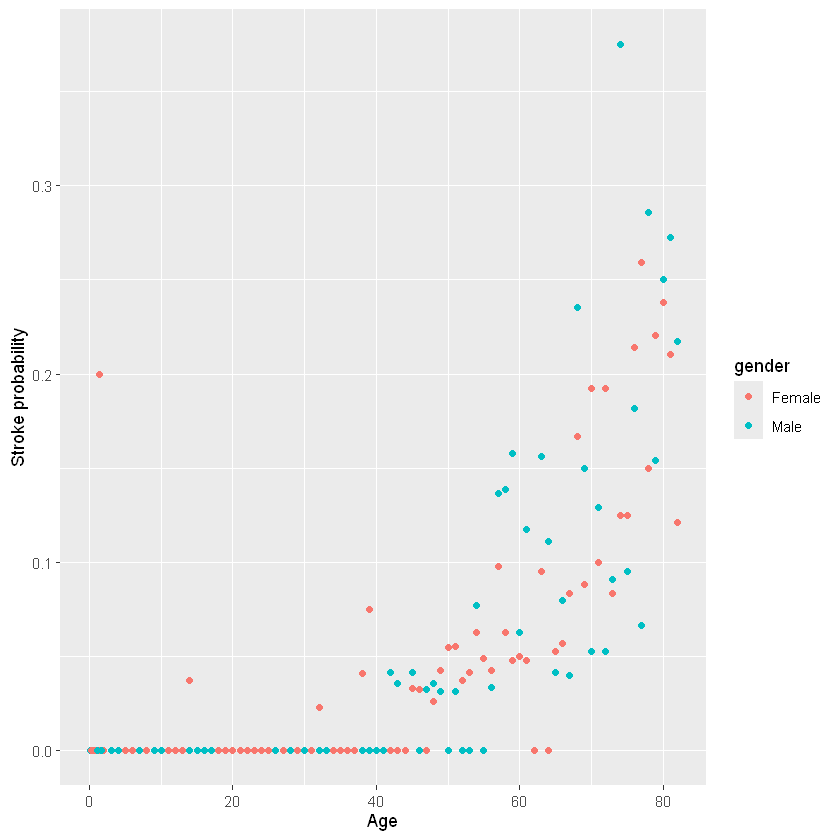

In [ ]:
ggplot(data=stroke_by_age)+geom_point(mapping = aes(x=age,y=stroke,color=gender))+labs(y="Stroke probability",x="Age")

In the scatterplot we can see that the probability looks about equal up until around age 60 where males seem to have a higher chance  for strokes.

Altough the scatterplot is a bit hard to read so a smoothed line will be ploted for each of the genders.

`geom_smooth()` using formula = 'y ~ x'


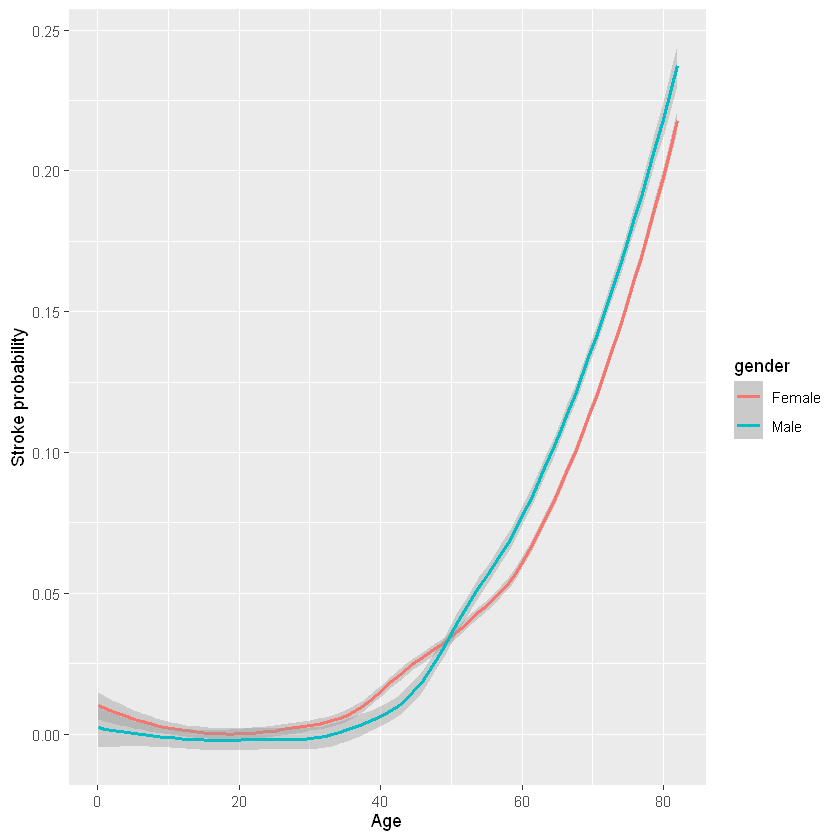

In [ ]:
ggplot(data=stroke_by_age)+geom_smooth(mapping = aes(x=age,y=stroke,color=gender),span=0.7
,method = "loess")+labs(y="Stroke probability",x="Age")

In the smoothed plot the tren observed in the scatterplot is much more clear. We can observe that the stroke probability is higher for women from around age 20 to 45 and then the probability of men having a stroke quite clearly climbs past that of women.